In [1]:
import numpy as np
import pandas as pd
import glob

In [2]:
#df = pd.read_csv('../input/petfinder-pawpularity-score/train.csv')
#tmp = pd.concat([df, pd.get_dummies(df['Pawpularity'])], axis=1)
#aaa = tmp.corr()
#tmp = pd.DataFrame([aaa[i].head(df.shape[1] - 1) for i in range(1, 101)])
#tmp.abs().max()

In [3]:
#np.load('train_df_prev_path.npy')

In [4]:
#df = pd.read_csv('../input/petfinder-adoption-prediction/train/train.csv')
#df['path'] = '../input/petfinder-adoption-prediction/train_images/' + df['PetID'] + '-1.jpg'
#tmp = df[~df['path'].isin(np.load('train_df_prev_path.npy'))]
#import os
#tmp = tmp[tmp['path'].map(os.path.exists)]

In [5]:
'''
import os
from PIL import Image
import imagehash
from tqdm.auto import tqdm
df1 = pd.read_csv('../input/petfinder-adoption-prediction/train/train.csv')
df1['path'] = '../input/petfinder-adoption-prediction/train_images/' + df1['PetID'] + '-1.jpg'
df1 = df1[df1['path'].map(os.path.exists)]

df2 = pd.read_csv('../input/petfinder-pawpularity-score/train.csv')
df2['path'] = df2['Id'].map(lambda x:str(f'../input/petfinder-pawpularity-score/train/{x}.jpg'))

df1['hash'] = [imagehash.average_hash(Image.open(x))
                    for x in tqdm(df1['path'].values)]
df2['hash'] = [imagehash.average_hash(Image.open(x))
                    for x in tqdm(df2['path'].values)]
#train_df_prev['hash'] = [imagehash.average_hash(Image.open(x))
#                    for x in tqdm(train_df_prev['path'].values)]
'''
pass


In [6]:
#np.save('isin_prev.npy', df2[df2['hash'].isin(df1['hash'])].path.unique())

In [7]:
#hashes = {x: imagehash.average_hash(Image.open(x)) 
# for x in tqdm(glob.glob('../input/petfinder-adoption-prediction/train_images/*jpg'))}

In [8]:
#df_all = pd.Series(hashes).to_frame('hash').reset_index()
#df_all['cat'] = df_all['index'].map(lambda x: int(x.split('-')[-1].split('.')[0]))
#df_all

0.17980080406492202
0.2019913432173226


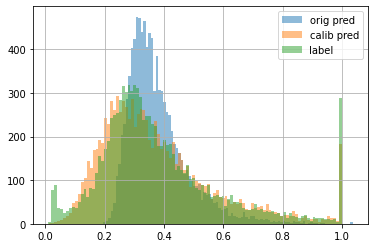

In [9]:
df = pd.read_csv('ens_exp4.csv')
df['loss'] = (df['pred'] - df['norm_score']) ** 2
print(np.sqrt(df['loss'].mean()))
df['pred'].hist(bins=100, alpha=0.5, label='orig pred')

df['pred'] = (df['pred'] - df['pred'].mean()) / df['pred'].std()
df['pred'] = (df['pred'] * df['norm_score'].std()) + df['norm_score'].mean()
df['pred'] = df['pred'].clip(0.01, 1)
df['pred'].hist(bins=100, alpha=0.5, label='calib pred')

df['norm_score'].hist(bins=100, alpha=0.5, label='label')

df['loss'] = (df['pred'].clip(0.01, 1) - df['norm_score']) ** 2
print(np.sqrt(df['loss'].mean()))

import matplotlib.pyplot as plt
plt.legend()
#m = df['pred'].mean()
#df['pred'] -= m
#df['pred'] = np.where(df['pred'] > df['pred'].quantile(1 - 0.029055690072639227), 1, df['pred'])
#df['pred'] += m
#df['loss'] = (df['pred'].clip(0.01, 1) - df['norm_score']) ** 2
#print(np.sqrt(df['loss'].mean()))

In [10]:
np.sqrt(321.50305)

17.93050612782584

In [11]:
df.corr()['Pawpularity']

Subject Focus   -0.009853
Eyes            -0.006686
Face             0.008018
Near             0.001001
Action          -0.001373
Accessory        0.013287
Group            0.016469
Collage          0.001732
Human            0.003983
Occlusion        0.001979
Info            -0.004735
Blur            -0.023540
Pawpularity      1.000000
norm_score       1.000000
bins             0.999479
fold             0.000028
pred             0.492157
loss             0.159404
Name: Pawpularity, dtype: float64

<AxesSubplot:>

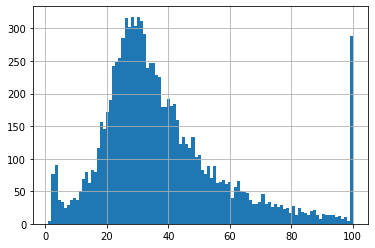

In [12]:
df['Pawpularity'].hist(bins=100)

<AxesSubplot:xlabel='Pawpularity'>

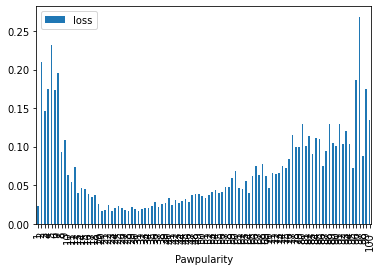

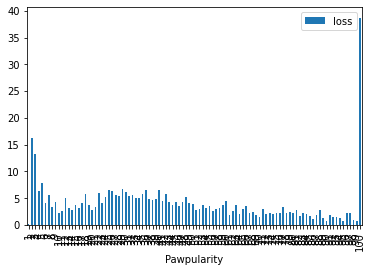

In [13]:
df.groupby('Pawpularity')[['loss']].mean().plot(kind='bar')
df.groupby('Pawpularity')[['loss']].sum().plot(kind='bar')

In [14]:
(df['Pawpularity'] == 100).mean()

0.029055690072639227

In [15]:
df.reset_index().corr()['loss']

index           -0.006309
Subject Focus    0.019256
Eyes            -0.025973
Face            -0.018834
Near             0.008557
Action          -0.004260
Accessory        0.000893
Group            0.000525
Collage          0.007749
Human            0.011669
Occlusion       -0.011295
Info             0.009076
Blur            -0.016934
Pawpularity      0.159404
norm_score       0.159404
bins             0.158565
fold             0.007180
pred             0.354108
loss             1.000000
Name: loss, dtype: float64

In [16]:
import os
[os.path.dirname(path) + '/train_cv_score.csv' for path in sorted(glob.glob('../exps/exp4_*/*_4.pth'))]

['../exps/exp4_beit_large_patch16_224/train_cv_score.csv',
 '../exps/exp4_cait_m36_384/train_cv_score.csv',
 '../exps/exp4_cait_s24_384/train_cv_score.csv',
 '../exps/exp4_cait_xs24_384/train_cv_score.csv',
 '../exps/exp4_crossvit_15_dagger_408/train_cv_score.csv',
 '../exps/exp4_crossvit_18_240/train_cv_score.csv',
 '../exps/exp4_crossvit_18_dagger_408/train_cv_score.csv',
 '../exps/exp4_crossvit_base_240/train_cv_score.csv',
 '../exps/exp4_crossvit_small_240/train_cv_score.csv',
 '../exps/exp4_pit_b_224/train_cv_score.csv',
 '../exps/exp4_xcit_large_24_p16_384_dist/train_cv_score.csv',
 '../exps/exp4_xcit_medium_24_p8_224/train_cv_score.csv',
 '../exps/exp4_xcit_medium_24_p8_224_dist/train_cv_score.csv',
 '../exps/exp4_xcit_small_24_p16_384_dist/train_cv_score.csv',
 '../exps/exp4_xcit_small_24_p8_224_dist/train_cv_score.csv',
 '../exps/exp4_xcit_small_24_p8_384_dist/train_cv_score.csv']

In [17]:
def proc(path):
    if 'exp15' in path:
        pred = pd.read_csv(path)['pred'].values
        return (np.exp(pred) / 100).clip(0, 1)
    elif 'exp9_' in path or 'exp12' in path:
        pred = np.load(path.replace('train_cv_score.csv', 'all_preds.npy'))
        return (pred.argmax(axis=1) + 1) / 100
    else:
        return pd.read_csv(path)['pred'].values.clip(0, 1)
    

aaa = [os.path.dirname(path) + '/train_cv_score.csv' for path in sorted(glob.glob('../exps/exp*/*_4.pth'))]
tmp = {path: proc(path) for path in aaa if 'exp10_' not in path and 'exp11_' not in path}
tmp = {k: v for k, v in tmp.items() if v.shape[0] == 9912}

df_pred = pd.DataFrame(tmp)

#df_pred['bias'] = 1
print(df_pred.shape)
pd.options.display.max_rows = 999
df_pred.head().T

(9912, 179)


,0,1,2,3,4
../exps/exp14_cait_m36_384/train_cv_score.csv,0.374268,0.381348,0.355469,0.372559,0.361572
../exps/exp15_beit_base_patch16_224_in22k/train_cv_score.csv,0.425211,0.377452,0.320966,0.289969,0.338346
../exps/exp15_beit_large_patch16_224/train_cv_score.csv,0.322222,0.463368,0.374515,0.251438,0.315373
../exps/exp15_cait_s24_384/train_cv_score.csv,0.291103,0.443880,0.345694,0.209265,0.359465
../exps/exp15_cait_xs24_384/train_cv_score.csv,0.379671,0.450870,0.308068,0.238522,0.298007
../exps/exp15_crossvit_15_240/train_cv_score.csv,0.376716,0.420257,0.326020,0.261965,0.320966
../exps/exp15_crossvit_18_240/train_cv_score.csv,0.365126,0.363702,0.305074,0.279951,0.331155
../exps/exp15_crossvit_base_240/train_cv_score.csv,0.388674,0.410522,0.343004,0.274537,0.306268
../exps/exp15_crossvit_small_240/train_cv_score.csv,0.366555,0.393256,0.324116,0.286590,0.361577
../exps/exp15_jx_nest_base/train_cv_score.csv,0.335713,0.583469,0.250947,0.269227,0.338346


In [18]:
!ls ../exps/exp7_swin_large_patch4_window12_384_in22k/

hist.log
swin_large_patch4_window12_384_in22k_0.pth
swin_large_patch4_window12_384_in22k_1.pth
swin_large_patch4_window12_384_in22k_2.pth
swin_large_patch4_window12_384_in22k_3.pth
swin_large_patch4_window12_384_in22k_4.pth
train_cv_score.csv


In [19]:
#pred = np.load('../exps/exp9_swin_base_patch4_window12_384/all_preds.npy')
#tmp = pd.DataFrame({'pred': pred.argmax(axis=1) + 1, 'label': (target * 100).astype(int)})
#tmp['ok'] = tmp['pred'] == tmp['label']
#tmp['ok'].mean()
#np.sqrt(((tmp['pred'] - tmp['label']) ** 2).mean())
#tmp.groupby('label')[['ok']].mean().sort_values('ok')

In [20]:
#df_pred2 = df_pred.copy()
#df_pred2['Pawpularity'] = pd.read_csv('../exps/exp1_swin_base_patch4_window12_384/train_cv_score.csv')['Pawpularity'].values
#df_pred2['Id'] = pd.read_csv('../exps/exp1_swin_base_patch4_window12_384/train_cv_score.csv')['path'].values
#df_pred2['Id'] = df_pred2['Id'].map(lambda x: x.split('/')[-1][:-4])
#df_pred2 = df_pred2[['Id', 'Pawpularity'] + df_pred.columns.values.tolist()]
#df_pred2.sort_values('Id').to_csv('cv_prediction.csv', index=False)

In [21]:
#df_pred2['Id'].map(lambda x: x.split('/')[-1][:-4])

In [22]:
target = pd.read_csv('../exps/exp8_beit_base_patch16_224_in22k/train_cv_score.csv')['norm_score'].values
pd.Series({col: np.sqrt(((df_pred[col] - target) ** 2).mean()) * 100 for col in df_pred}).sort_values().to_frame('rmse')

,rmse
../exps/exp1_swin_base_patch4_window12_384/train_cv_score.csv,17.644284
../exps/exp7_cait_m36_384/train_cv_score.csv,17.661636
../exps/exp7_swin_large_patch4_window12_384_in22k/train_cv_score.csv,17.687250
../exps/exp1_swin_large_patch4_window12_384_in22k/train_cv_score.csv,17.700086
../exps/exp6_swin_large_patch4_window12_384_in22k/train_cv_score.csv,17.712623
../exps/exp1_swin_large_patch4_window12_384/train_cv_score.csv,17.716052
../exps/exp7_cait_s24_384/train_cv_score.csv,17.741667
../exps/exp6_cait_s24_384/train_cv_score.csv,17.745131
../exps/exp1_swin_large_patch4_window7_224/train_cv_score.csv,17.753384
../exps/exp6_beit_large_patch16_224/train_cv_score.csv,17.760300


array([[<AxesSubplot:title={'center':'norm_score'}>,
        <AxesSubplot:title={'center':'pred'}>]], dtype=object)

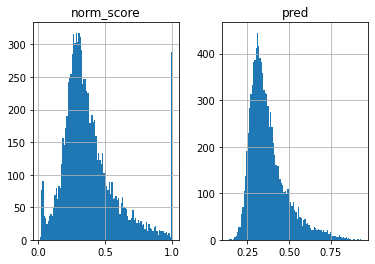

In [23]:
df = pd.read_csv('../exps/exp1_swin_base_patch4_window12_384/train_cv_score.csv')
df[['norm_score', 'pred']].hist(bins=100)

In [24]:
df['Pawpularity'].mean(), df['Pawpularity'].var()

(38.03904358353511, 424.030056516317)

In [25]:
#print(train_df_prev.shape)
#train_df_prev = train_df_prev[train_df_prev['path'].isin(np.load('train_df_prev_path.npy'))]
#print(train_df_prev.shape)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

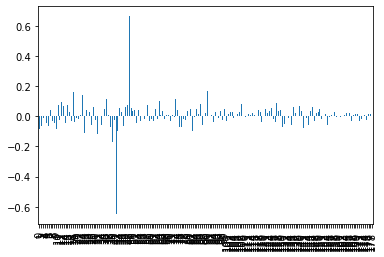

In [26]:
coef = np.linalg.lstsq(df_pred.values, target)[0]
pd.Series(coef).plot(kind='bar')

In [27]:
pd.options.display.max_rows = 999
pd.Series(coef, index=df_pred.columns.values).sort_values(ascending=False).to_frame('coef')
#coef

,coef
../exps/exp2_vit_large_patch32_224/train_cv_score.csv,0.666126
../exps/exp6_beit_large_patch16_224/train_cv_score.csv,0.167655
../exps/exp1_swin_base_patch4_window12_384/train_cv_score.csv,0.161449
../exps/exp1_swin_large_patch4_window12_384_in22k/train_cv_score.csv,0.142637
../exps/exp2_vit_base_patch16_384/train_cv_score.csv,0.117295
../exps/exp4_beit_large_patch16_224/train_cv_score.csv,0.114024
../exps/exp2_vit_small_resnet50d_s16_224/train_cv_score.csv,0.104590
../exps/exp15_twins_svt_small/train_cv_score.csv,0.094657
../exps/exp7_vit_base_patch16_224_miil_in21k/train_cv_score.csv,0.089776
../exps/exp6_vit_small_r26_s32_384/train_cv_score.csv,0.083604


In [28]:
df_pred2 = df_pred.copy()

for i in range(df_pred2.shape[1]):
    coef = np.linalg.lstsq(df_pred2.values, target)[0]
    cols = df_pred2.columns[np.argsort(coef)][1:]
    if min(coef) > 0.02:
        break
    df_pred2 = df_pred2[cols]
    #print(df_pred2.shape)
coef, coef.sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


(array([0.02366292, 0.02485176, 0.02758805, 0.02469826, 0.02702198,
        0.02835395, 0.03339969, 0.03802281, 0.03370734, 0.03619695,
        0.04163936, 0.04551501, 0.04747467, 0.05073013, 0.05444688,
        0.05537552, 0.0563306 , 0.08250548, 0.11466612, 0.15055795]),
 0.9967454382758248)

In [29]:
df_pred2

,../exps/exp2_vit_large_patch16_224_in21k/train_cv_score.csv,../exps/exp8_vit_base_patch16_224_miil_in21k/train_cv_score.csv,../exps/exp9_crossvit_base_240/train_cv_score.csv,../exps/exp15_vit_large_patch16_224/train_cv_score.csv,../exps/exp4_xcit_small_24_p8_384_dist/train_cv_score.csv,../exps/exp7_vit_base_r50_s16_384/train_cv_score.csv,../exps/exp7_vit_base_patch16_224_miil_in21k/train_cv_score.csv,../exps/exp9_crossvit_18_dagger_408/train_cv_score.csv,../exps/exp2_vit_large_patch16_224/train_cv_score.csv,../exps/exp6_swin_large_patch4_window12_384_in22k/train_cv_score.csv,../exps/exp2_vit_base_patch16_224_miil_in21k/train_cv_score.csv,../exps/exp9_cait_m36_384/train_cv_score.csv,../exps/exp4_xcit_small_24_p16_384_dist/train_cv_score.csv,../exps/exp15_vit_base_patch16_224_miil_in21k/train_cv_score.csv,../exps/exp2_vit_base_r50_s16_384/train_cv_score.csv,../exps/exp7_cait_m36_384/train_cv_score.csv,../exps/exp6_jx_nest_base/train_cv_score.csv,../exps/exp1_swin_large_patch4_window12_384_in22k/train_cv_score.csv,../exps/exp6_beit_large_patch16_224/train_cv_score.csv,../exps/exp1_swin_base_patch4_window12_384/train_cv_score.csv
0,0.367951,0.383789,0.25,0.381902,0.350199,0.300438,0.354992,1.00,0.408336,0.389314,0.362518,0.26,0.407569,0.375981,0.281208,0.301156,0.350310,0.312790,0.346652,0.382257
1,0.394259,0.331299,0.28,0.401796,0.394726,0.423398,0.432782,0.29,0.305076,0.488001,0.377311,0.32,0.436862,0.394025,0.411584,0.454472,0.528549,0.405449,0.519049,0.361615
2,0.368065,0.345703,0.30,0.329863,0.294215,0.277963,0.280616,0.30,0.354321,0.321034,0.432962,0.32,0.355999,0.281597,0.301362,0.386127,0.356671,0.346762,0.357343,0.330255
3,0.233182,0.219849,0.25,0.283251,0.297878,0.285671,0.289171,0.31,0.197909,0.217338,0.335133,0.26,0.257765,0.285473,0.192084,0.251648,0.212559,0.226784,0.250179,0.208018
4,0.338842,0.354980,0.28,0.358063,0.317109,0.308919,0.306423,0.35,0.288970,0.335786,0.294824,0.28,0.305387,0.283251,0.286070,0.360827,0.277571,0.229363,0.345105,0.361277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,0.537830,0.370605,0.34,0.378930,0.451206,0.377828,0.427636,0.30,0.373876,0.409752,0.514583,0.35,0.458409,0.431907,0.492104,0.351200,0.426023,0.434461,0.349644,0.542045
9908,0.485790,0.447266,1.00,0.567731,0.468517,0.563078,0.530115,1.00,0.325306,0.531605,0.428413,1.00,0.510756,0.480887,0.378517,0.452113,0.531164,0.468031,0.529111,0.560824
9909,0.337422,0.296143,0.28,0.270809,0.393502,0.349977,0.255901,0.29,0.307982,0.232136,0.304352,0.30,0.344443,0.275073,0.305387,0.265499,0.325199,0.243642,0.250546,0.402216
9910,0.369884,0.398193,0.30,0.467003,0.369656,0.403684,0.359027,0.27,0.381853,0.309441,0.417509,0.30,0.418103,0.428546,0.336876,0.387053,0.445198,0.382257,0.389082,0.382603


In [30]:
!pip install cvxopt

In [31]:
from cvxopt import matrix, solvers
df_pred2 = df_pred.copy()
for i in range(df_pred2.shape[1]):
    Q = np.dot(df_pred2.T, df_pred2)
    q = - np.dot(target, df_pred2)
    G = - np.eye(Q.shape[0])
    h = np.zeros(Q.shape[0])
    sol = solvers.qp(matrix(Q), matrix(q), matrix(G), matrix(h))

    coef = np.array(sol['x'])[:, 0]
    cols = df_pred2.columns[np.argsort(coef)][1:]
    if min(coef) > 0.02:
        break
    df_pred2 = df_pred2[cols]
    print(df_pred2.shape)
    


     pcost       dcost       gap    pres   dres
 0: -7.8495e+02 -7.8570e+02  2e+02  2e+01  7e-04
 1: -7.8485e+02 -7.8515e+02  3e+01  2e+00  9e-05
 2: -7.8373e+02 -7.8352e+02  7e+00  4e-01  2e-05
 3: -7.8253e+02 -7.8263e+02  4e+00  1e-01  7e-06
 4: -7.8195e+02 -7.8213e+02  1e+00  3e-02  2e-06
 5: -7.8185e+02 -7.8192e+02  2e-01  5e-03  2e-07
 6: -7.8187e+02 -7.8188e+02  1e-02  1e-04  7e-09
 7: -7.8188e+02 -7.8188e+02  6e-04  5e-06  2e-10
 8: -7.8188e+02 -7.8188e+02  2e-05  6e-08  3e-12
Optimal solution found.
(9912, 178)
     pcost       dcost       gap    pres   dres
 0: -7.8493e+02 -7.8568e+02  2e+02  2e+01  7e-04
 1: -7.8483e+02 -7.8513e+02  3e+01  2e+00  9e-05
 2: -7.8371e+02 -7.8351e+02  7e+00  4e-01  2e-05
 3: -7.8249e+02 -7.8264e+02  4e+00  2e-01  7e-06
 4: -7.8194e+02 -7.8214e+02  1e+00  3e-02  2e-06
 5: -7.8185e+02 -7.8192e+02  2e-01  5e-03  2e-07
 6: -7.8187e+02 -7.8188e+02  1e-02  1e-04  7e-09
 7: -7.8188e+02 -7.8188e+02  6e-04  5e-06  2e-10
 8: -7.8188e+02 -7.8188e+02  2e-05 

<AxesSubplot:>

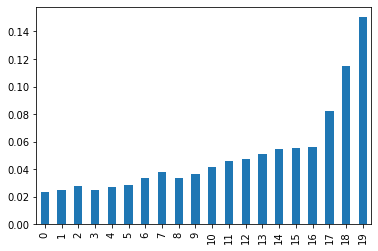

In [32]:
pd.Series(np.array(sol['x'])[:, 0]).plot(kind='bar')

In [33]:
!ls ../exps/exp6_beit_large_patch16_224

beit_large_patch16_224_0.pth  beit_large_patch16_224_3.pth  train_cv_score.csv
beit_large_patch16_224_1.pth  beit_large_patch16_224_4.pth
beit_large_patch16_224_2.pth  hist.log


In [47]:
df['pred'] = np.dot(df_pred2, coef)
df.to_csv('ens_exp4-0111.csv', index=False)

In [35]:
res = pd.DataFrame({'col': df_pred2.columns, 'coef': coef}).sort_values('coef', ascending=False)
res

,col,coef
19,../exps/exp1_swin_base_patch4_window12_384/tra...,0.150558
18,../exps/exp6_beit_large_patch16_224/train_cv_s...,0.114666
17,../exps/exp1_swin_large_patch4_window12_384_in...,0.082505
16,../exps/exp6_jx_nest_base/train_cv_score.csv,0.056331
15,../exps/exp7_cait_m36_384/train_cv_score.csv,0.055376
14,../exps/exp2_vit_base_r50_s16_384/train_cv_sco...,0.054447
13,../exps/exp15_vit_base_patch16_224_miil_in21k/...,0.050730
12,../exps/exp4_xcit_small_24_p16_384_dist/train_...,0.047475
11,../exps/exp9_cait_m36_384/train_cv_score.csv,0.045515
10,../exps/exp2_vit_base_patch16_224_miil_in21k/t...,0.041639


In [36]:
res.set_index('col')['coef'].sort_index().to_dict()

{'../exps/exp15_vit_base_patch16_224_miil_in21k/train_cv_score.csv': 0.05073009910560989,
 '../exps/exp15_vit_large_patch16_224/train_cv_score.csv': 0.02469826920948417,
 '../exps/exp1_swin_base_patch4_window12_384/train_cv_score.csv': 0.15055788478920187,
 '../exps/exp1_swin_large_patch4_window12_384_in22k/train_cv_score.csv': 0.08250544590956377,
 '../exps/exp2_vit_base_patch16_224_miil_in21k/train_cv_score.csv': 0.04163936408647383,
 '../exps/exp2_vit_base_r50_s16_384/train_cv_score.csv': 0.05444685702612055,
 '../exps/exp2_vit_large_patch16_224/train_cv_score.csv': 0.033707367771076975,
 '../exps/exp2_vit_large_patch16_224_in21k/train_cv_score.csv': 0.02366292791456943,
 '../exps/exp4_xcit_small_24_p16_384_dist/train_cv_score.csv': 0.04747462376708553,
 '../exps/exp4_xcit_small_24_p8_384_dist/train_cv_score.csv': 0.02702206187200957,
 '../exps/exp6_beit_large_patch16_224/train_cv_score.csv': 0.11466607243935409,
 '../exps/exp6_jx_nest_base/train_cv_score.csv': 0.056330587861406135,

In [37]:
for path in res['col'].sort_values().values:
    if 1:#'exp7' in path:
        print('gsutil -m cp -r', os.path.dirname(path), 'gs://takami-kaggle-12/pet/')

gsutil -m cp -r ../exps/exp15_vit_base_patch16_224_miil_in21k gs://takami-kaggle-12/pet/
gsutil -m cp -r ../exps/exp15_vit_large_patch16_224 gs://takami-kaggle-12/pet/
gsutil -m cp -r ../exps/exp1_swin_base_patch4_window12_384 gs://takami-kaggle-12/pet/
gsutil -m cp -r ../exps/exp1_swin_large_patch4_window12_384_in22k gs://takami-kaggle-12/pet/
gsutil -m cp -r ../exps/exp2_vit_base_patch16_224_miil_in21k gs://takami-kaggle-12/pet/
gsutil -m cp -r ../exps/exp2_vit_base_r50_s16_384 gs://takami-kaggle-12/pet/
gsutil -m cp -r ../exps/exp2_vit_large_patch16_224 gs://takami-kaggle-12/pet/
gsutil -m cp -r ../exps/exp2_vit_large_patch16_224_in21k gs://takami-kaggle-12/pet/
gsutil -m cp -r ../exps/exp4_xcit_small_24_p16_384_dist gs://takami-kaggle-12/pet/
gsutil -m cp -r ../exps/exp4_xcit_small_24_p8_384_dist gs://takami-kaggle-12/pet/
gsutil -m cp -r ../exps/exp6_beit_large_patch16_224 gs://takami-kaggle-12/pet/
gsutil -m cp -r ../exps/exp6_jx_nest_base gs://takami-kaggle-12/pet/
gsutil -m cp 

In [38]:
res.col.sort_values().values.tolist()

['../exps/exp15_vit_base_patch16_224_miil_in21k/train_cv_score.csv',
 '../exps/exp15_vit_large_patch16_224/train_cv_score.csv',
 '../exps/exp1_swin_base_patch4_window12_384/train_cv_score.csv',
 '../exps/exp1_swin_large_patch4_window12_384_in22k/train_cv_score.csv',
 '../exps/exp2_vit_base_patch16_224_miil_in21k/train_cv_score.csv',
 '../exps/exp2_vit_base_r50_s16_384/train_cv_score.csv',
 '../exps/exp2_vit_large_patch16_224/train_cv_score.csv',
 '../exps/exp2_vit_large_patch16_224_in21k/train_cv_score.csv',
 '../exps/exp4_xcit_small_24_p16_384_dist/train_cv_score.csv',
 '../exps/exp4_xcit_small_24_p8_384_dist/train_cv_score.csv',
 '../exps/exp6_beit_large_patch16_224/train_cv_score.csv',
 '../exps/exp6_jx_nest_base/train_cv_score.csv',
 '../exps/exp6_swin_large_patch4_window12_384_in22k/train_cv_score.csv',
 '../exps/exp7_cait_m36_384/train_cv_score.csv',
 '../exps/exp7_vit_base_patch16_224_miil_in21k/train_cv_score.csv',
 '../exps/exp7_vit_base_r50_s16_384/train_cv_score.csv',
 '../e

In [39]:
print('\n'.join(sorted([c[8:].split('/')[0] for c in res['col'].values.tolist()])))

exp15_vit_base_patch16_224_miil_in21k
exp15_vit_large_patch16_224
exp1_swin_base_patch4_window12_384
exp1_swin_large_patch4_window12_384_in22k
exp2_vit_base_patch16_224_miil_in21k
exp2_vit_base_r50_s16_384
exp2_vit_large_patch16_224
exp2_vit_large_patch16_224_in21k
exp4_xcit_small_24_p16_384_dist
exp4_xcit_small_24_p8_384_dist
exp6_beit_large_patch16_224
exp6_jx_nest_base
exp6_swin_large_patch4_window12_384_in22k
exp7_cait_m36_384
exp7_vit_base_patch16_224_miil_in21k
exp7_vit_base_r50_s16_384
exp8_vit_base_patch16_224_miil_in21k
exp9_cait_m36_384
exp9_crossvit_18_dagger_408
exp9_crossvit_base_240


In [40]:
for path in res['col'].sort_values().values:
    if 1:#not 'exp7' in path and not 'exp4' in path and not 'exp9' in path:
        exp = path.split('/')[2].split('_')[0]
        print('gsutil -m cp -r', os.path.dirname(path), f'gs://takami-kaggle-12/pet/{exp}/')

gsutil -m cp -r ../exps/exp15_vit_base_patch16_224_miil_in21k gs://takami-kaggle-12/pet/exp15/
gsutil -m cp -r ../exps/exp15_vit_large_patch16_224 gs://takami-kaggle-12/pet/exp15/
gsutil -m cp -r ../exps/exp1_swin_base_patch4_window12_384 gs://takami-kaggle-12/pet/exp1/
gsutil -m cp -r ../exps/exp1_swin_large_patch4_window12_384_in22k gs://takami-kaggle-12/pet/exp1/
gsutil -m cp -r ../exps/exp2_vit_base_patch16_224_miil_in21k gs://takami-kaggle-12/pet/exp2/
gsutil -m cp -r ../exps/exp2_vit_base_r50_s16_384 gs://takami-kaggle-12/pet/exp2/
gsutil -m cp -r ../exps/exp2_vit_large_patch16_224 gs://takami-kaggle-12/pet/exp2/
gsutil -m cp -r ../exps/exp2_vit_large_patch16_224_in21k gs://takami-kaggle-12/pet/exp2/
gsutil -m cp -r ../exps/exp4_xcit_small_24_p16_384_dist gs://takami-kaggle-12/pet/exp4/
gsutil -m cp -r ../exps/exp4_xcit_small_24_p8_384_dist gs://takami-kaggle-12/pet/exp4/
gsutil -m cp -r ../exps/exp6_beit_large_patch16_224 gs://takami-kaggle-12/pet/exp6/
gsutil -m cp -r ../exps/e

In [41]:
path.split('/')[2].split('_')[0]

'exp9'

In [42]:
pred = np.dot(df_pred2, coef)
#pred = pred - pred.mean() + 0.3803904358353526
np.sqrt(((pred - target) ** 2).mean())

0.17133616544665758

In [43]:
pred = np.dot(df_pred2, coef)
pred = pred - pred.mean() + 0.3803904358353526
pred = pred.clip(0.01, 1)
np.sqrt(((pred - target) ** 2).mean())

0.17133309468370037

In [44]:
[(np.nan, 0.17271177601929089)]

[(nan, 0.17271177601929089)]

In [45]:
aaa = []
i = np.nan
for i in np.linspace(0, 0.5, 100):
pred = np.dot(df_pred2, coef)
mu = pred.mean()
pred = (pred - mu)
pred = np.where(pred > 0, pred * 1.1, pred * 1.12) + 0.3803904358353526
pred = pred.clip(0.01, 1)
aaa.append((i, np.sqrt(((pred - target) ** 2).mean())))

sorted(aaa, key=lambda x: x[1])

IndentationError: expected an indented block (1107677758.py, line 4)

In [ ]:
_pred = np.dot(df_pred2, coef)
def score(mu, sigma):
    pred = _pred * sigma - mu
    pred = pred.clip(0.01, 1)
    return np.sqrt(((pred - target) ** 2).mean())

aaa = [((m, s), score(m, s)) for m in np.linspace(0, 0.5, 100) for s in np.linspace(0.5, 1.5, 100)]

In [ ]:
#sorted(aaa, key=lambda x: x[1])

In [ ]:
pred = np.dot(df_pred2, coef)
for i in range(100):
    pred = pred / pred.mean() * 0.3803904358353526
    pred = pred.clip(0.01, 1)
np.sqrt(((pred - target) ** 2).mean())

In [ ]:
pred = np.dot(df_pred2, coef)
for i in range(100):
    pred = pred - pred.mean() + 0.3803904358353526
    pred = pred.clip(0.01, 1)
np.sqrt(((pred - target) ** 2).mean())

In [ ]:
0.17139471886213498

In [ ]:
pred = np.dot(df_pred2, coef)
pred = (pred - pred.mean()) / pred.std()
pred = pred * (target.std()) + 0.3803904358353526
pred = pred.clip(0.01, 1)
np.sqrt(((pred - target) ** 2).mean())

In [ ]:
np.corrcoef(np.dot(df_pred2, coef), target)

In [ ]:
res.set_index('col')['coef'].to_dict()

In [ ]:
res.set_index('col')['coef'].sum()

In [ ]:
df['pred'] = np.dot(df_pred2, coef)
#df.to_csv('ens_exp9.csv', index=False)

In [ ]:
df